In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [7]:
train=pd.read_csv('Downloads/Telegram Desktop/Movie_collection_train.csv')

In [8]:
train.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

In [10]:
train.dropna(axis=0,inplace=True)

In [11]:
Label_encoder=preprocessing.LabelEncoder()
train['Genre']=Label_encoder.fit_transform(train['Genre'])
train['MPAA_film_rating']=Label_encoder.fit_transform(train['MPAA_film_rating'])
train['3D_available']=Label_encoder.fit_transform(train['3D_available'])

In [12]:
train.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,0,494,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,0,462,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,1,38,0,458,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,0,472,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,0,395,0


In [13]:
train.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [14]:
np.any(np.isnan(train))

False

In [15]:
import seaborn as sns

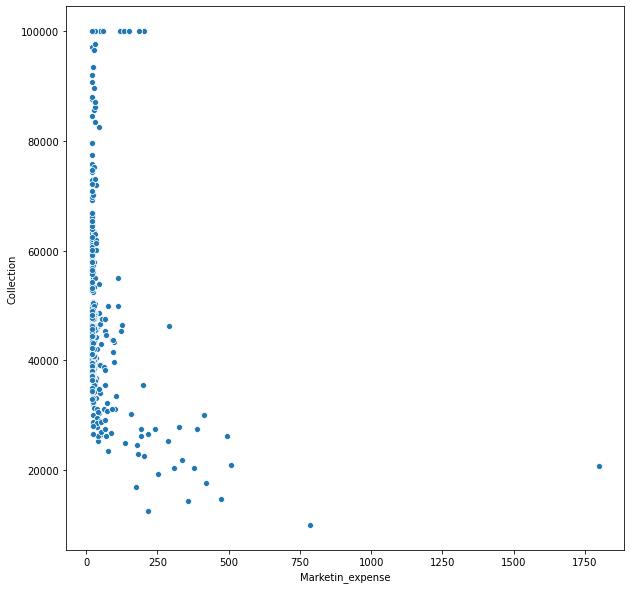

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Marketin_expense'],y=train['Collection'])

In [56]:
a=train.loc[train['Marketin_expense'] > 1750].index
print(a)
train.drop(a , inplace=True)

Int64Index([380], dtype='int64')


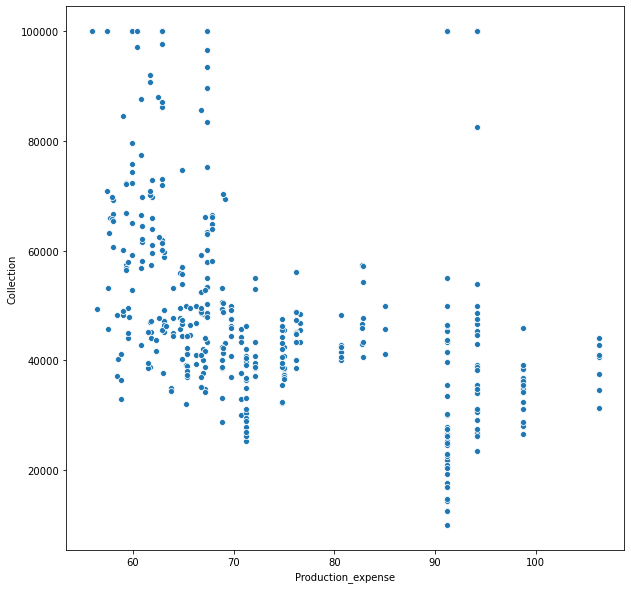

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Production_expense'],y=train['Collection'])

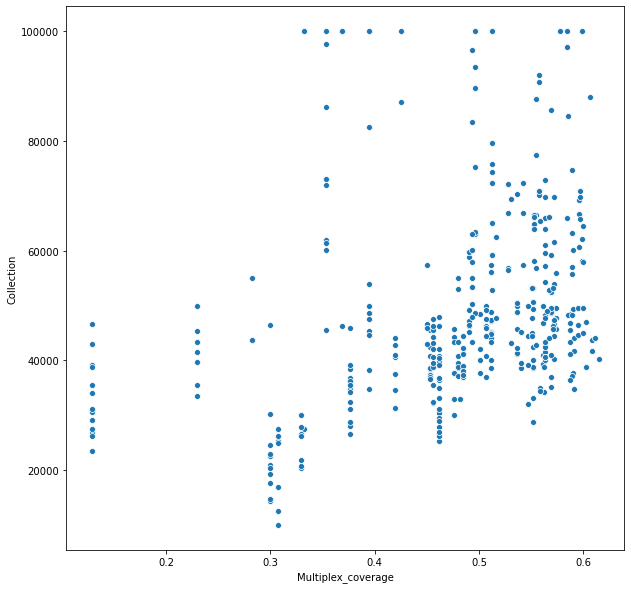

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Multiplex_coverage'],y=train['Collection'])

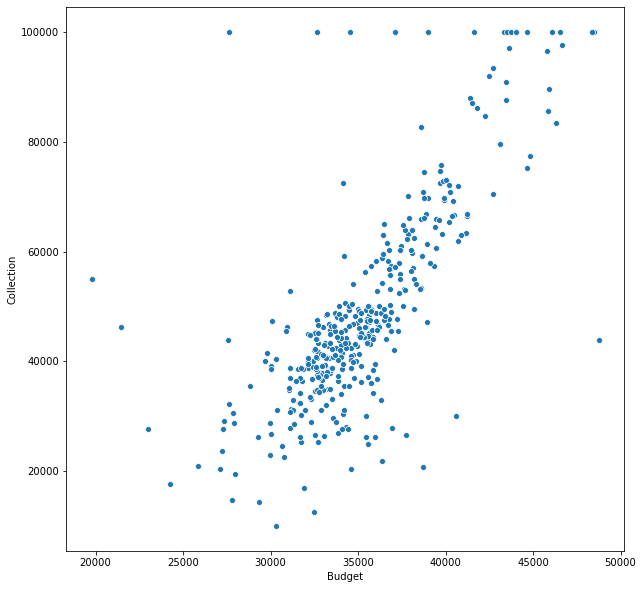

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=train['Collection'],x=train['Budget'])

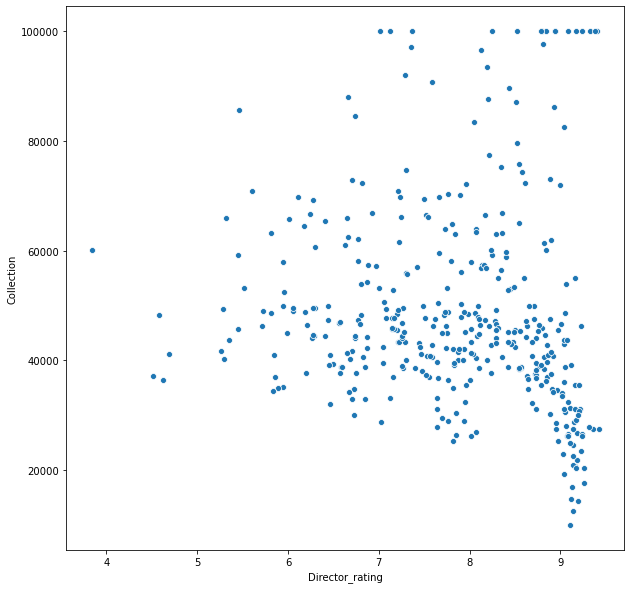

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Director_rating'],y=train['Collection'])

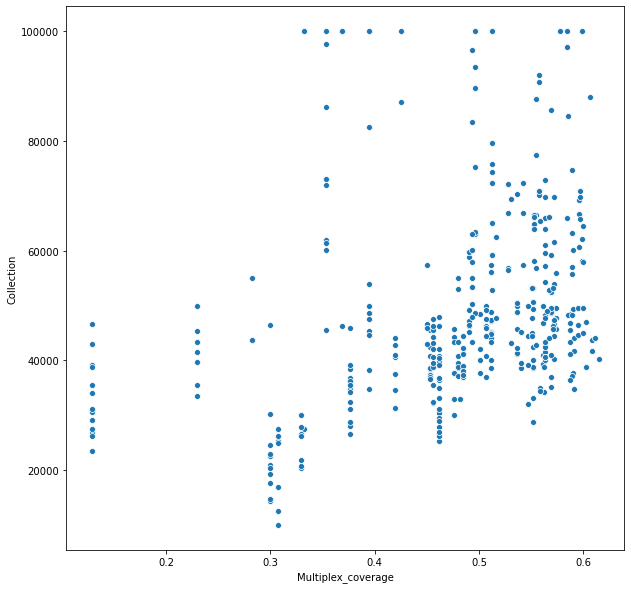

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Multiplex_coverage'],y=train['Collection'])

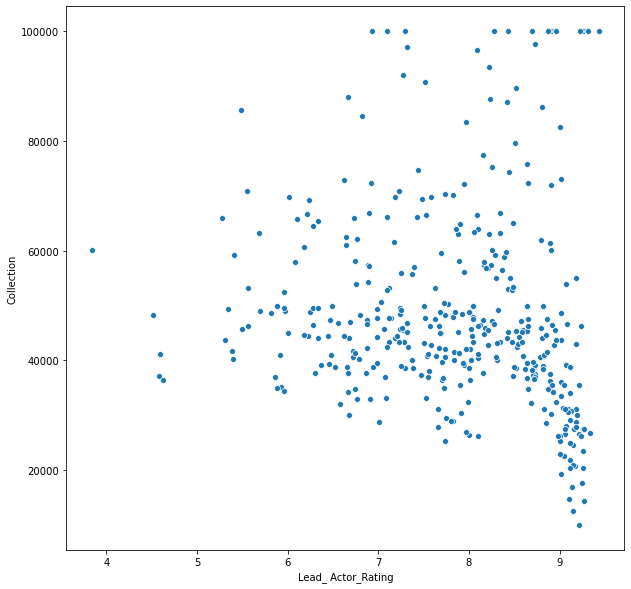

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Lead_ Actor_Rating'],y=train['Collection'])

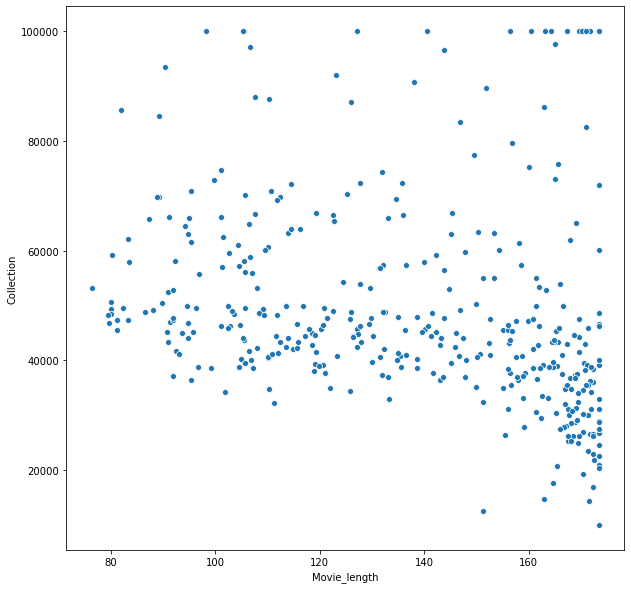

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Movie_length'],y=train['Collection'])

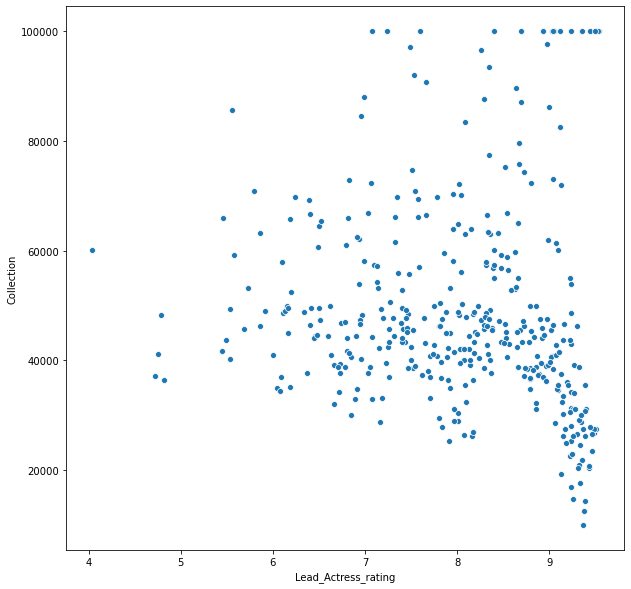

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Lead_Actress_rating'],y=train['Collection'])

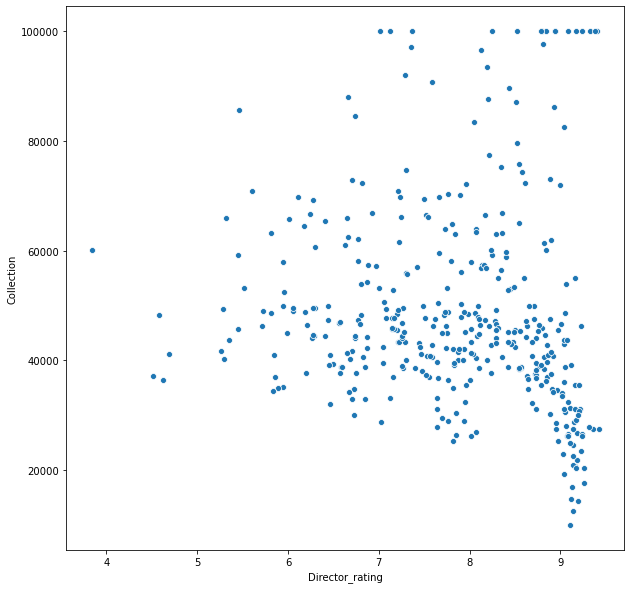

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Director_rating'],y=train['Collection'])

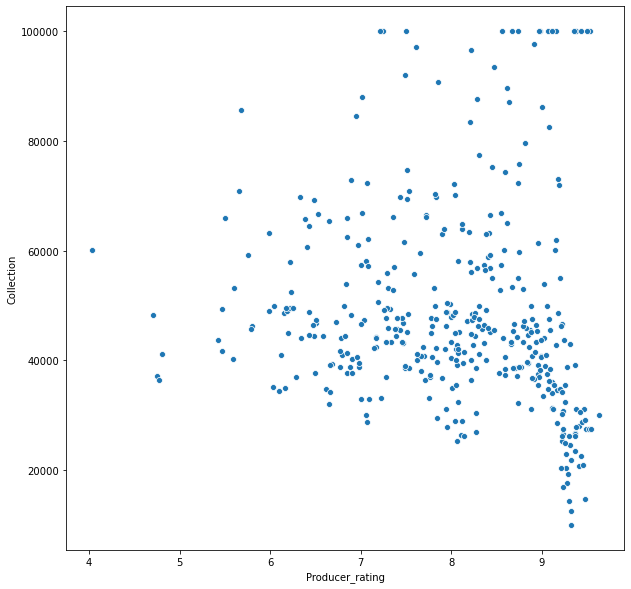

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Producer_rating'],y=train['Collection'])

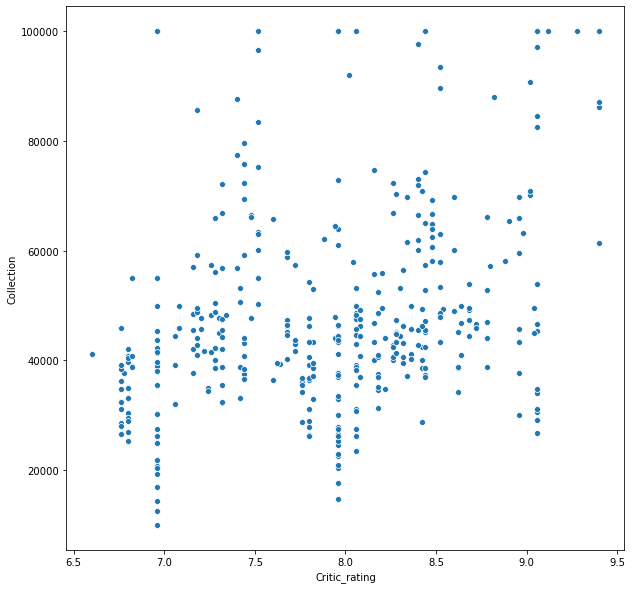

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Critic_rating'],y=train['Collection'])

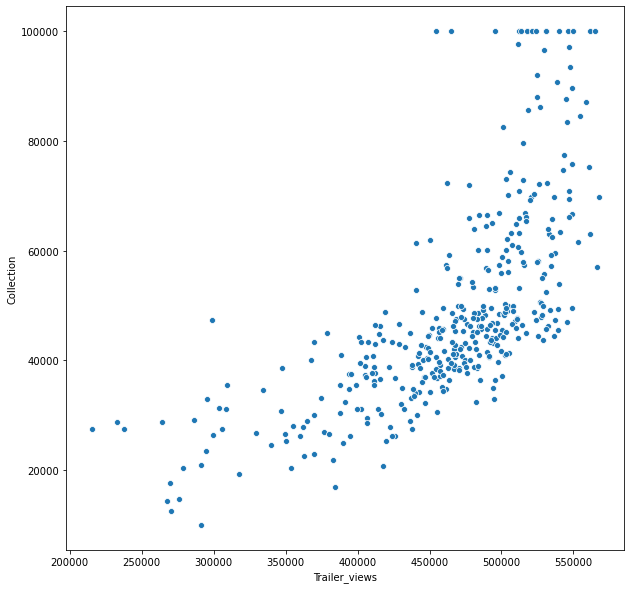

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Trailer_views'],y=train['Collection'])

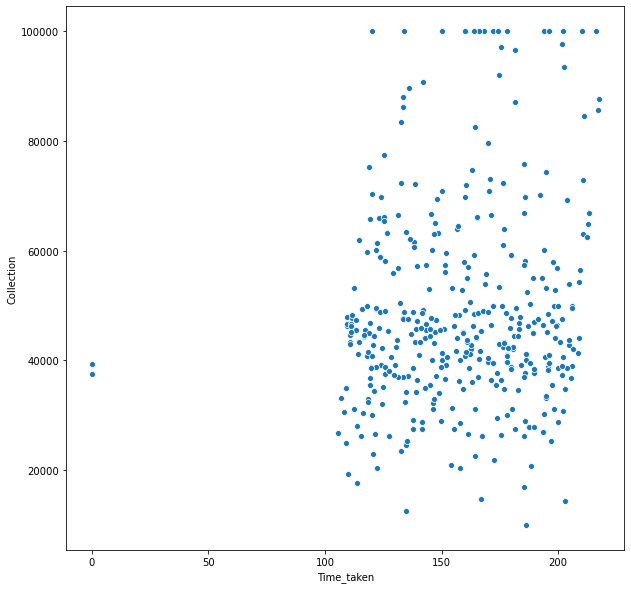

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Time_taken'],y=train['Collection'])

In [61]:
a=train.loc[train['Time_taken'] < 10].index
print(a)
train.drop(a , inplace=True)

Int64Index([], dtype='int64')


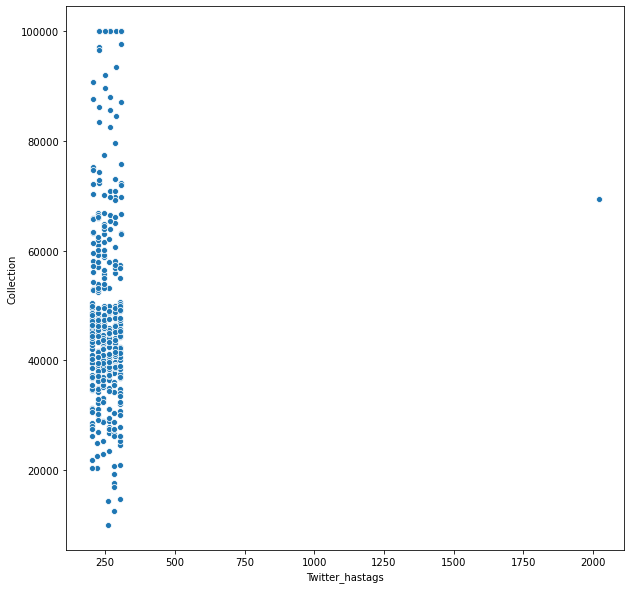

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Twitter_hastags'],y=train['Collection'])

In [62]:
a=train.loc[train['Twitter_hastags'] > 1750].index
print(a)
train.drop(a , inplace=True)

Int64Index([2], dtype='int64')


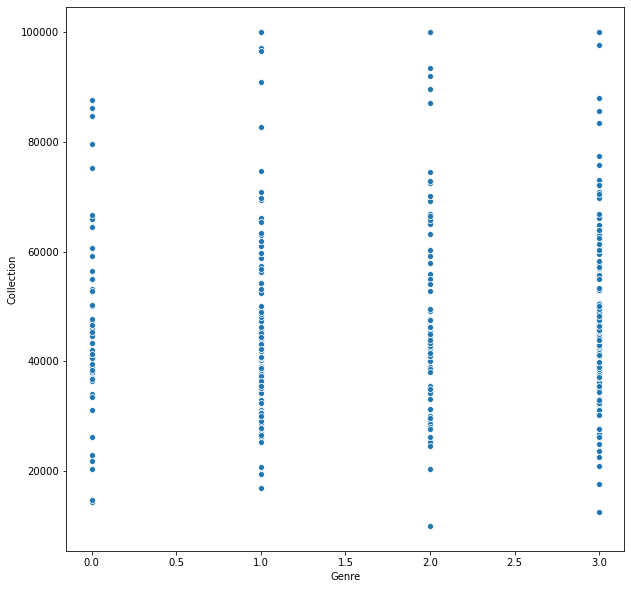

In [51]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Genre'],y=train['Collection'])

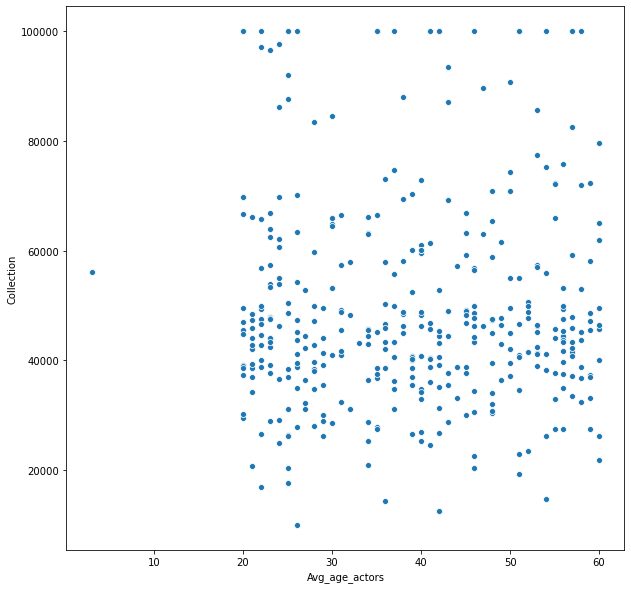

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Avg_age_actors'],y=train['Collection'])

In [63]:
a=train.loc[train['Avg_age_actors'] < 10].index
print(a)
train.drop(a , inplace=True)

Int64Index([213], dtype='int64')


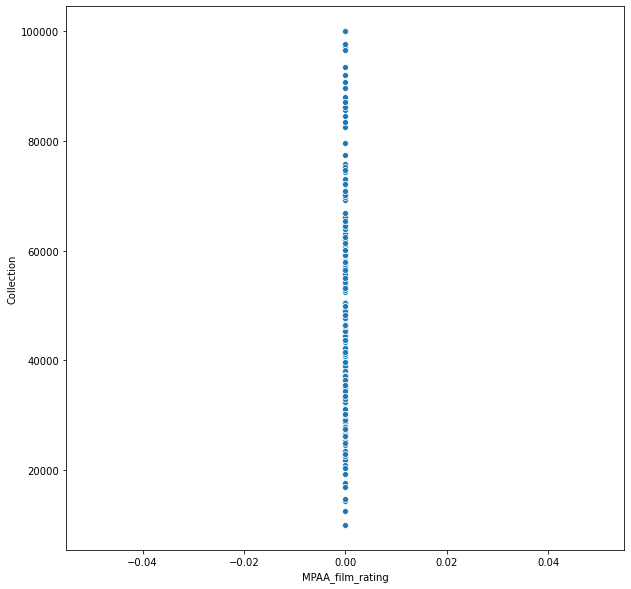

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['MPAA_film_rating'],y=train['Collection'])

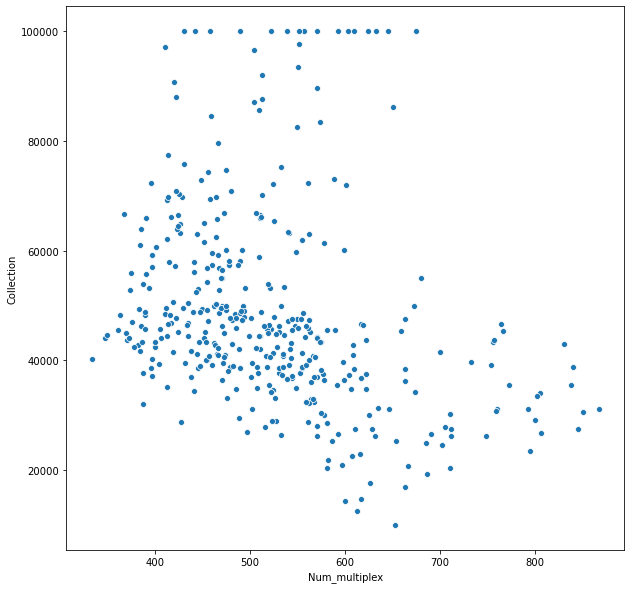

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Num_multiplex'],y=train['Collection'])

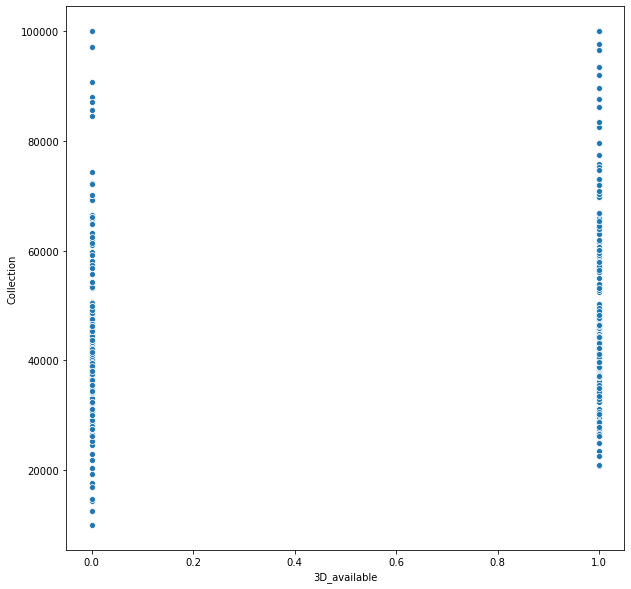

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['3D_available'],y=train['Collection'])

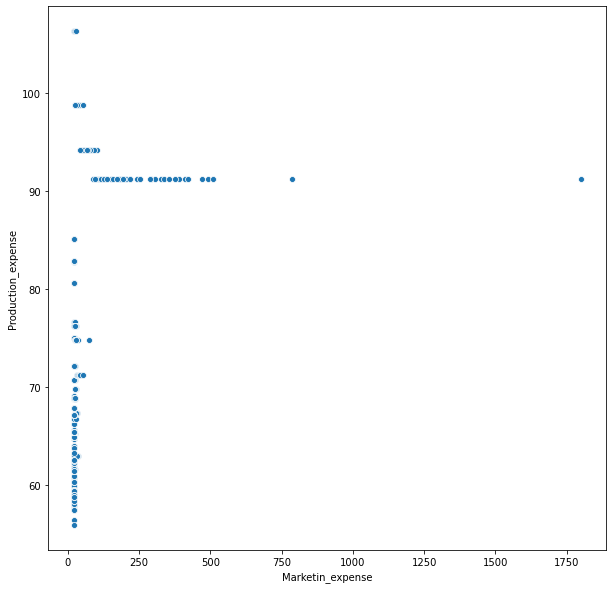

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Marketin_expense'],y=train['Production_expense'])

In [64]:
a=train.loc[train['Marketin_expense'] > 1750].index
print(a)
train.drop(a , inplace=True)

Int64Index([], dtype='int64')


In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
train

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,0,494,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,0,462,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,0,472,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,0,395,0
5,57400,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,143.48,284.592,1,53,0,460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,26200,194.3350,91.20,0.307,35946.405,172.3,8.980,9.260,9.085,9.225,7.96,424127,115.24,302.096,0,29,0,712,0
396,25000,137.4410,91.20,0.307,35579.775,169.5,9.115,9.180,9.100,9.255,6.96,390048,109.00,222.000,3,24,0,685,1
397,17000,173.4404,91.20,0.307,31924.585,172.4,9.135,9.230,9.125,9.240,6.96,384688,185.40,281.360,1,22,0,663,0
398,10000,787.0360,91.20,0.307,30291.415,173.5,9.215,9.370,9.105,9.330,6.96,291101,186.00,260.800,2,26,0,653,0


In [67]:
x=train.drop(['Collection'],axis=1,inplace=False)
y=train['Collection']

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=5)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(193, 18) (194, 18) (193,) (194,)


In [70]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred=regressor.predict(x_test)
df_pred=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df_pred

,Actual,predicted
161,100000,69882.997738
396,25000,40924.643285
116,42400,45447.569077
52,50000,56767.872980
326,46000,47644.696613
...,...,...
286,40200,38394.150816
153,38800,26095.948330
279,70200,66827.655676
90,45200,61800.887764


In [72]:
r2_score(y_test,y_pred)

0.669047957514478